<a href="https://colab.research.google.com/github/GuadalupeVargas07/EDA/blob/main/heapSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arreglo original: [68, 94, 95, 43, 88, 4, 5, 59, 88, 63, 100, 42, 25, 85, 75]


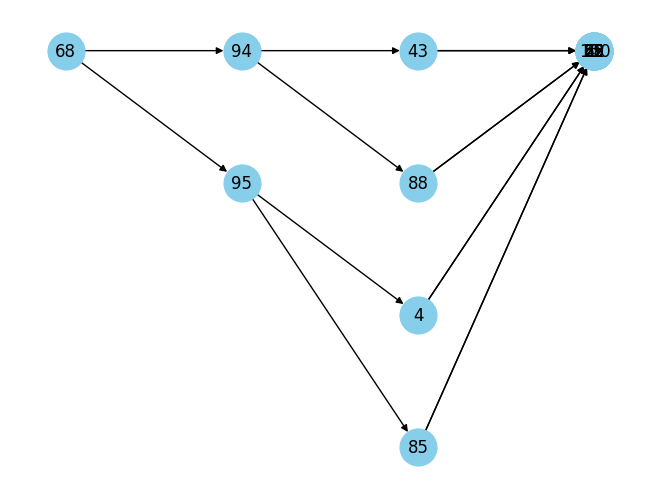

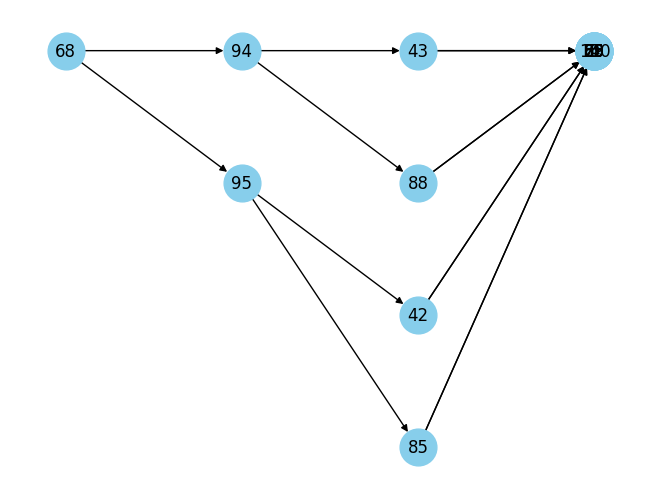

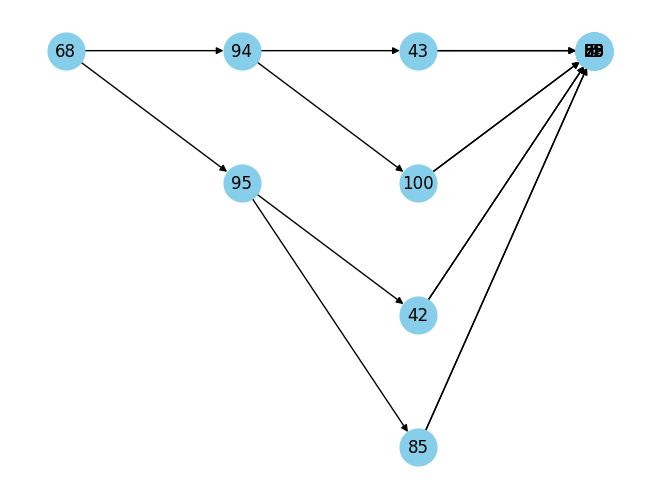

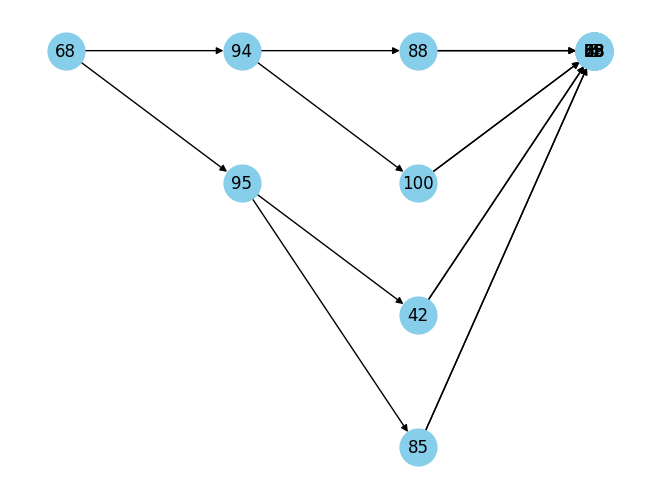

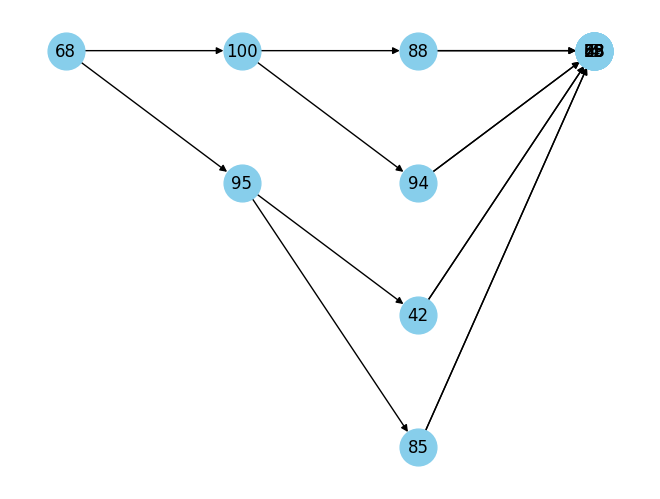

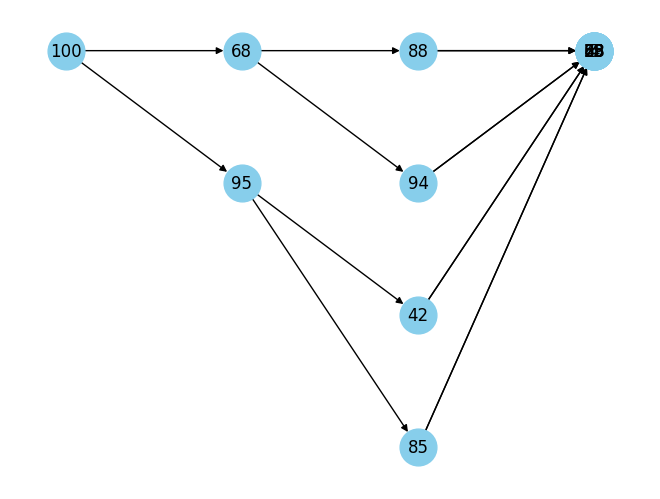

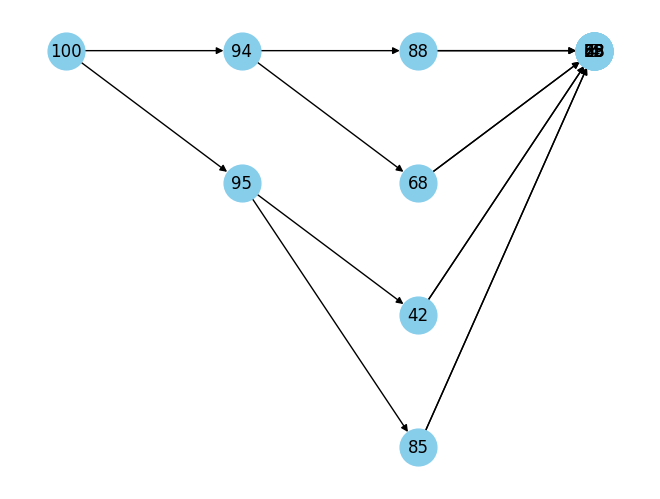

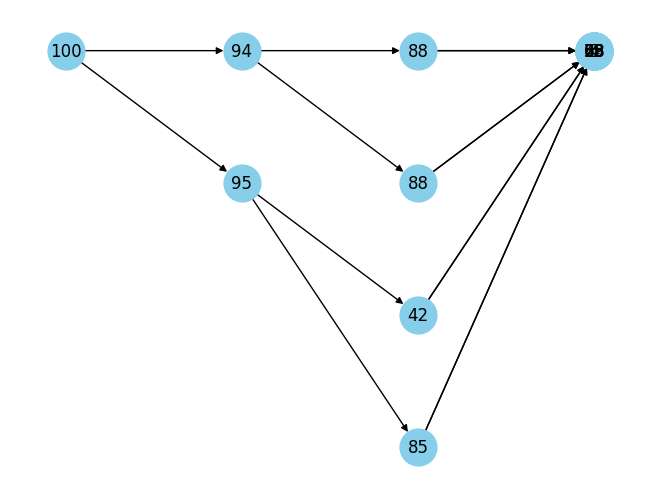

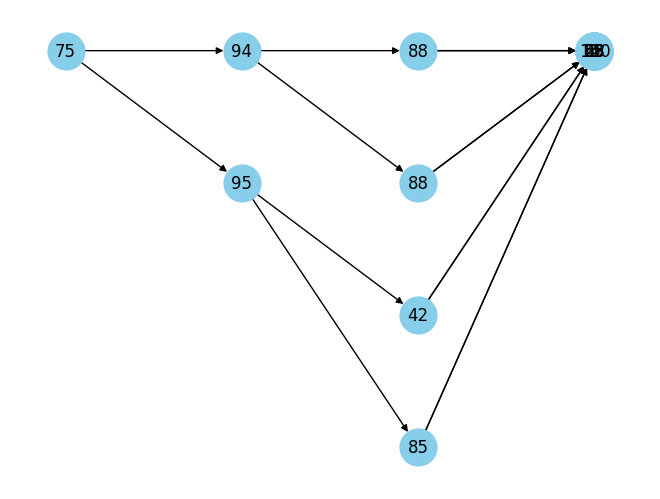

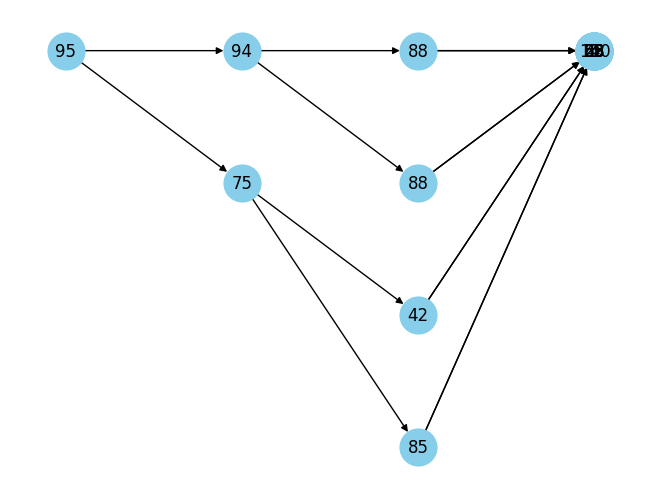

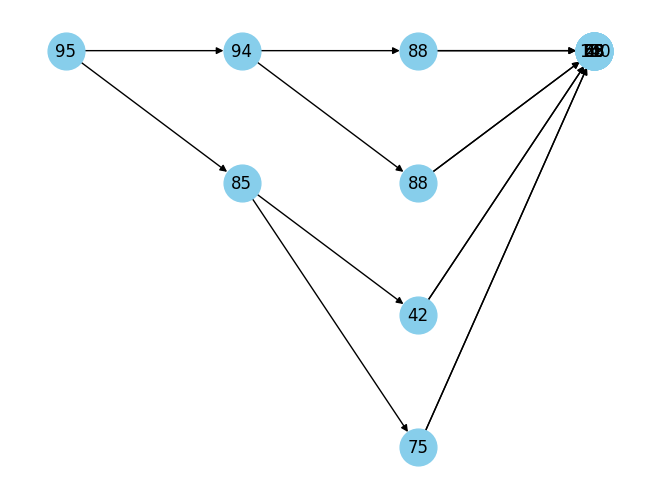

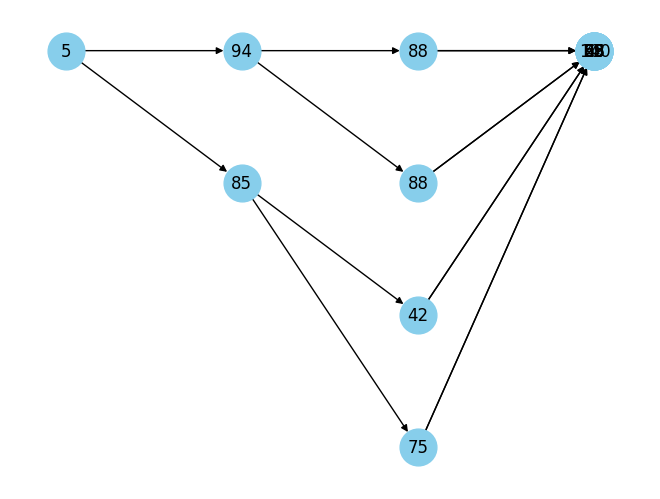

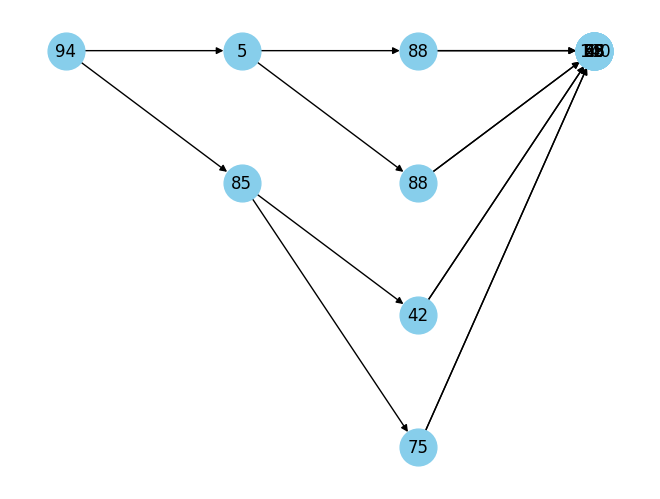

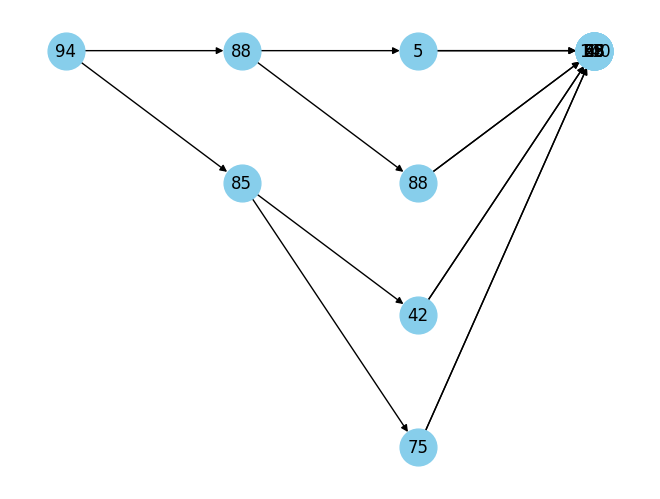

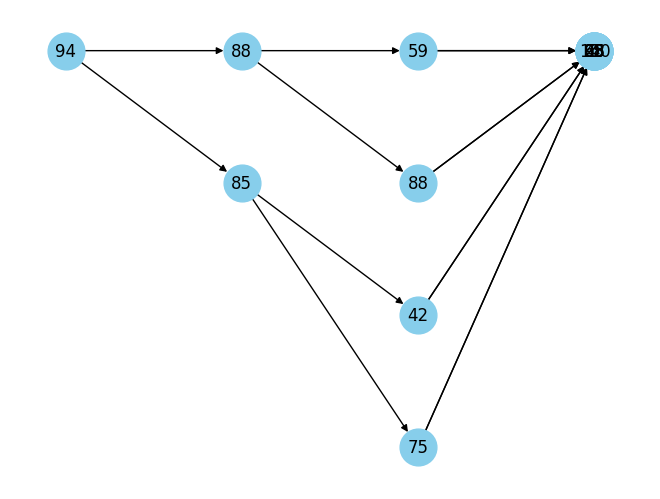

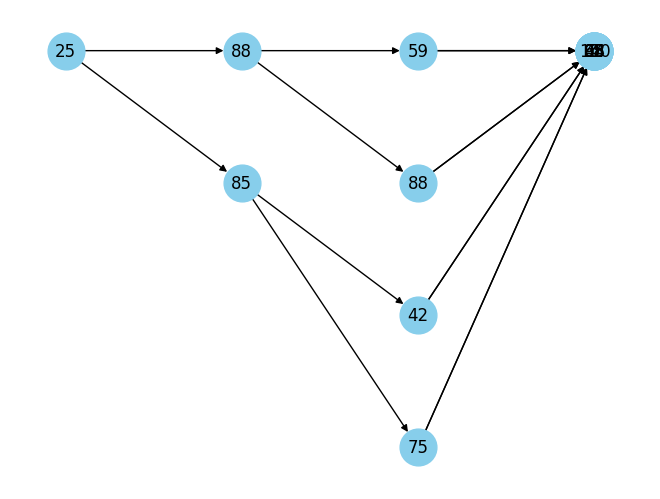

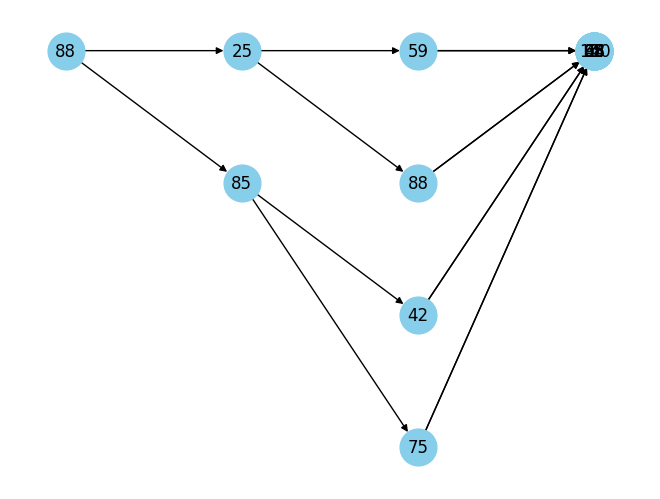

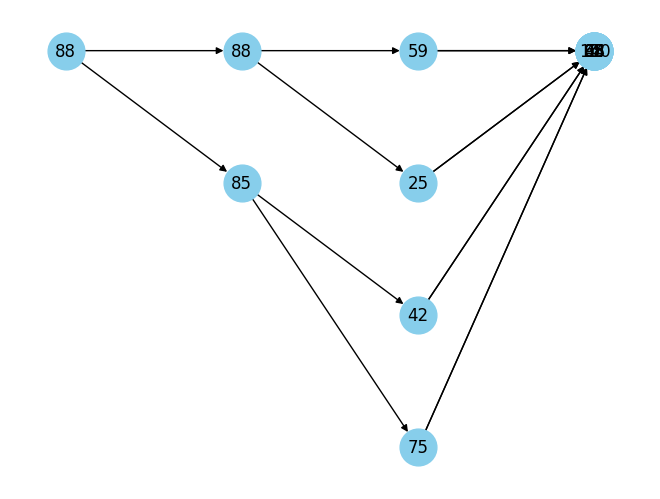

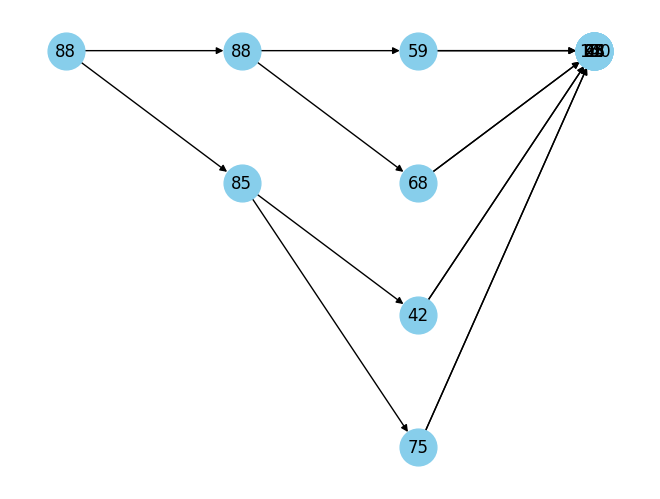

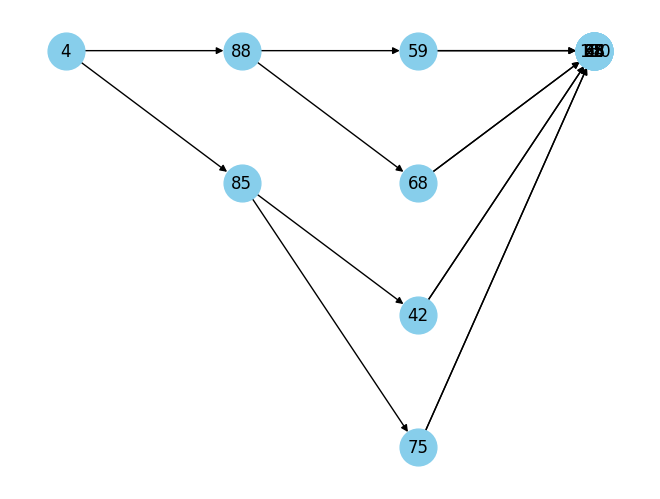

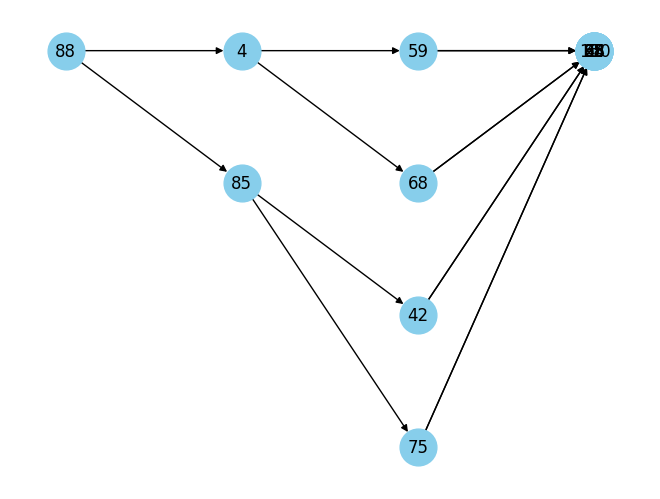

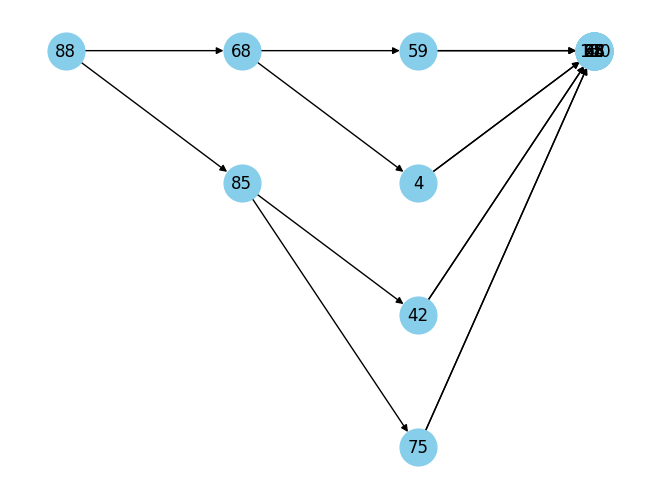

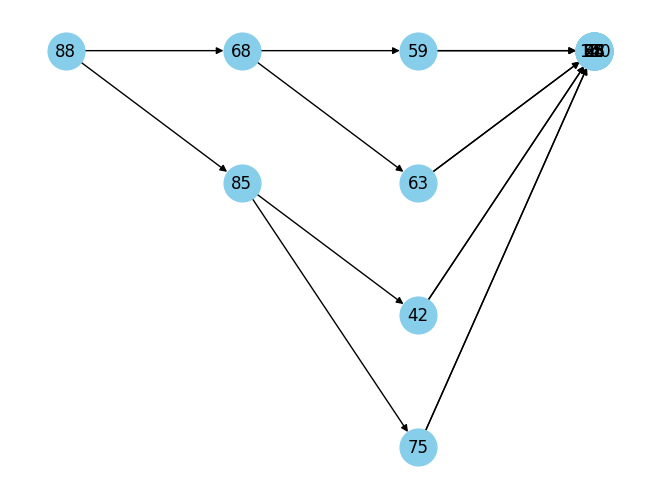

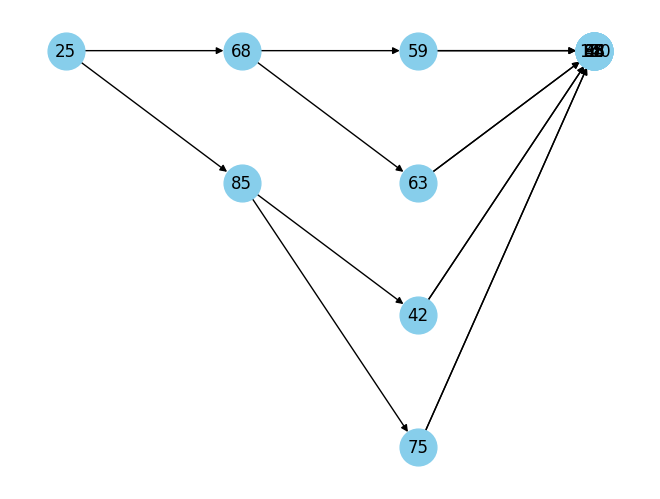

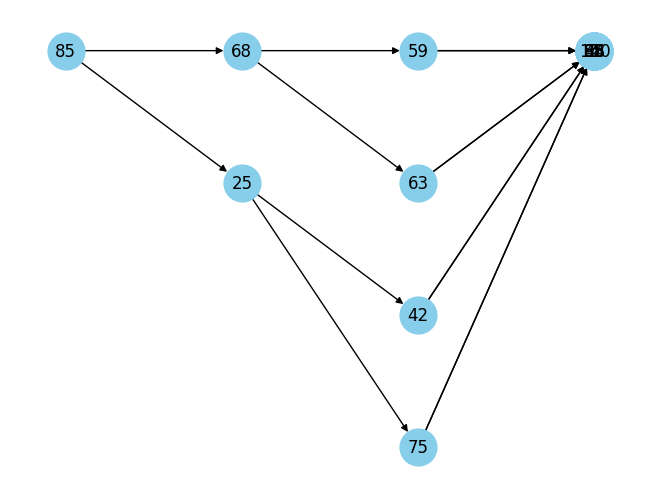

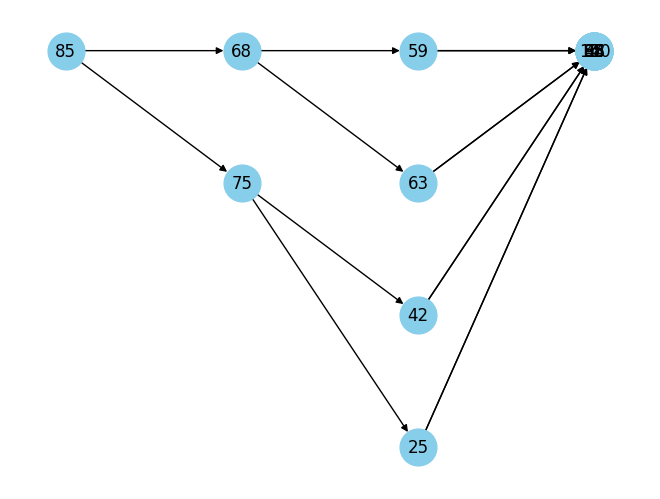

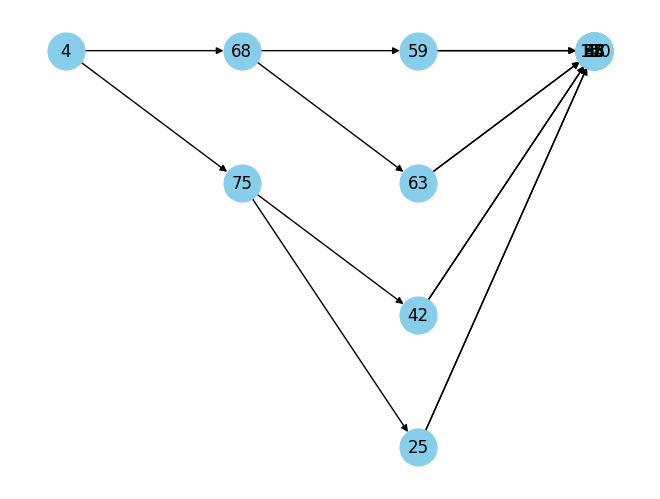

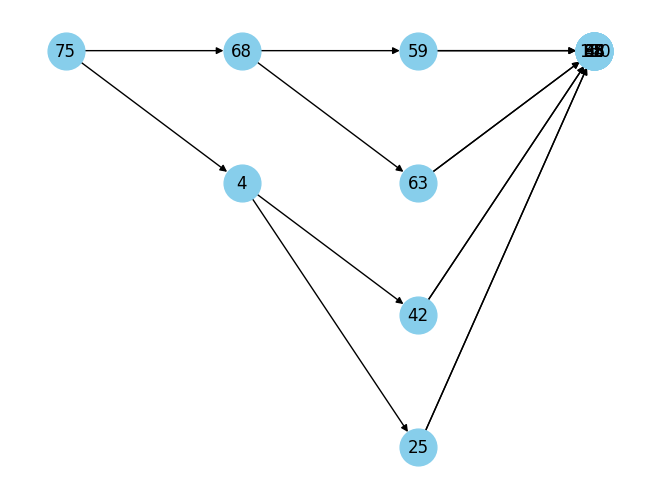

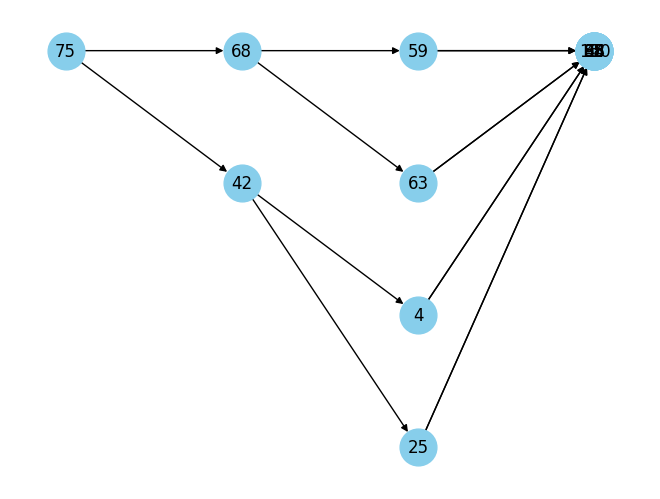

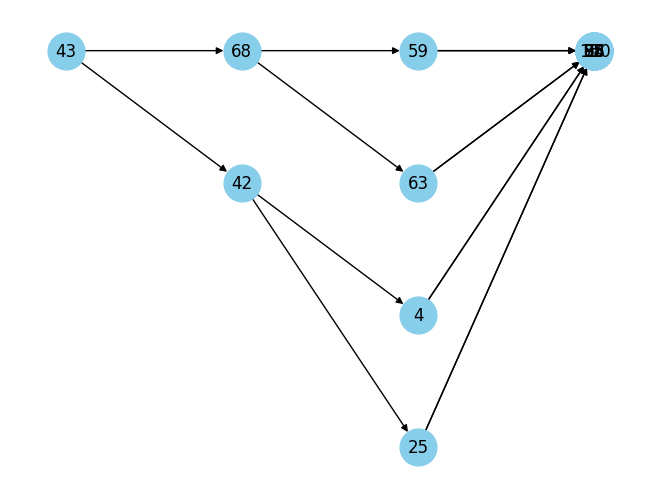

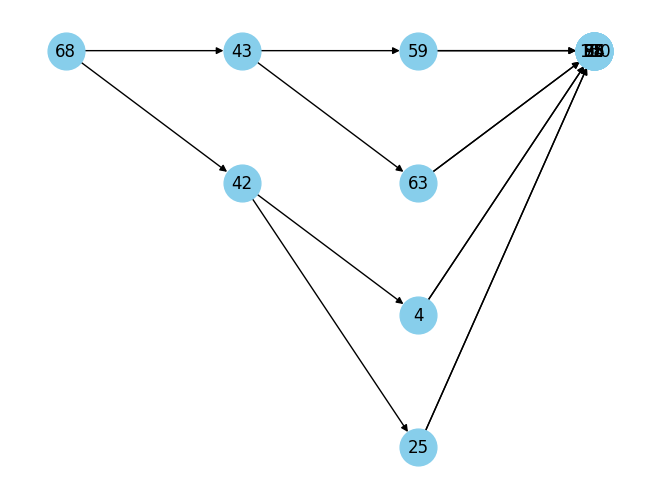

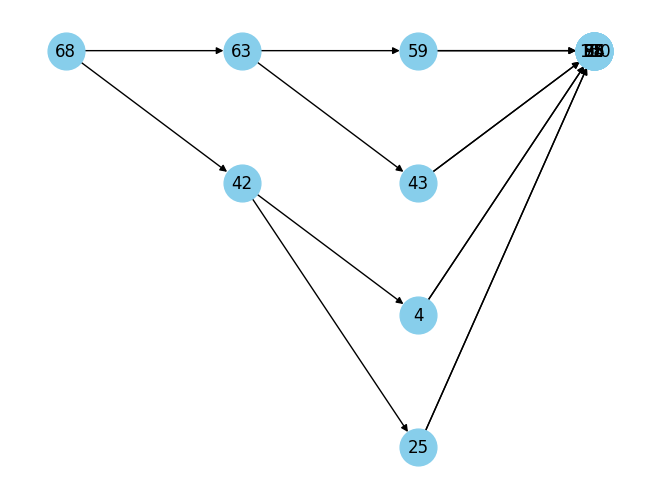

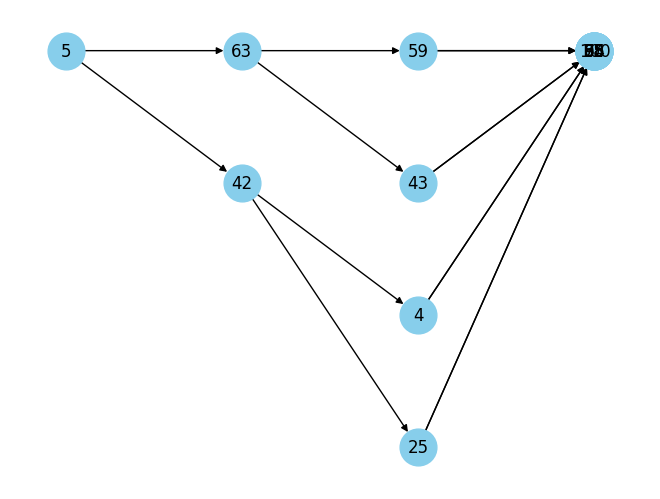

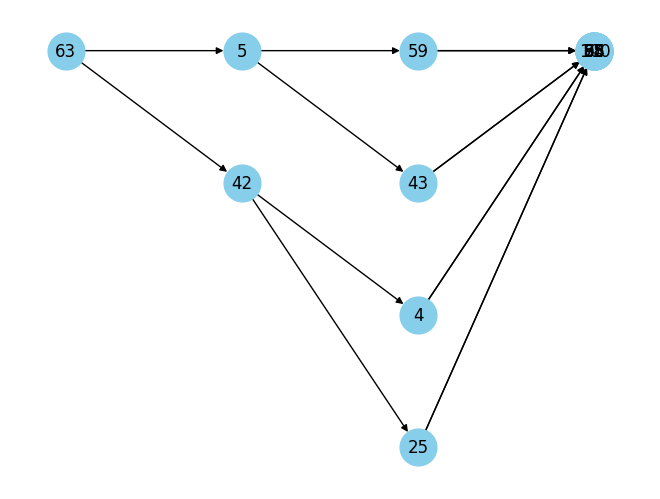

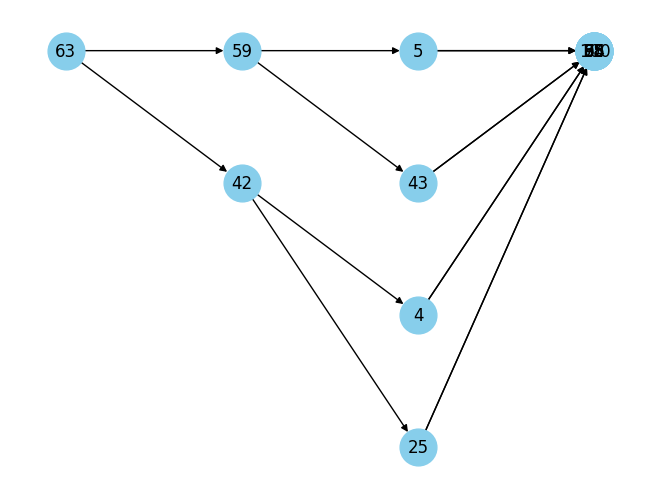

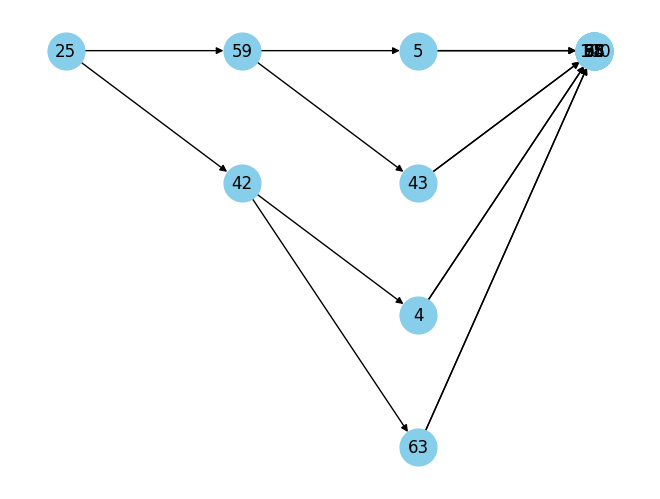

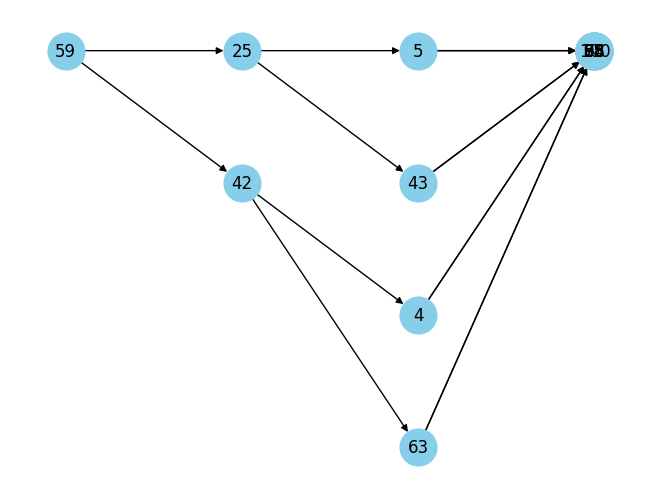

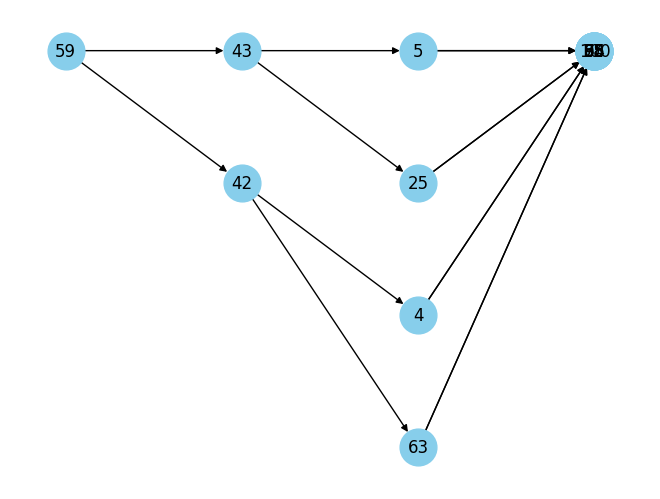

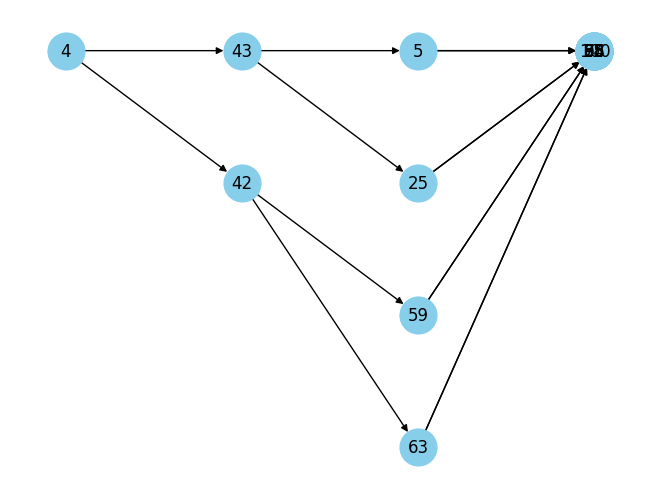

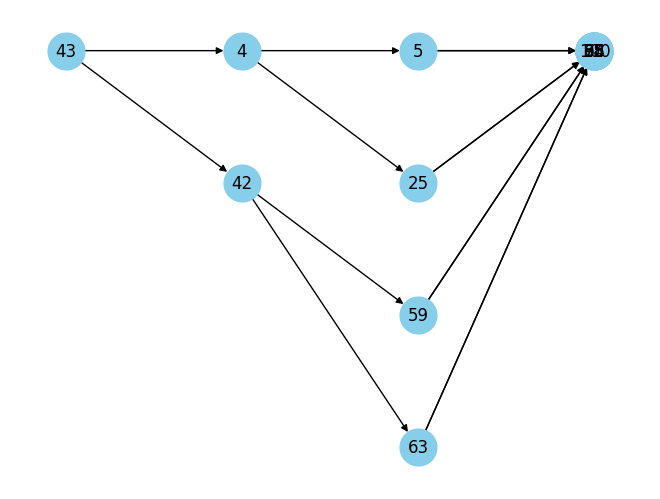

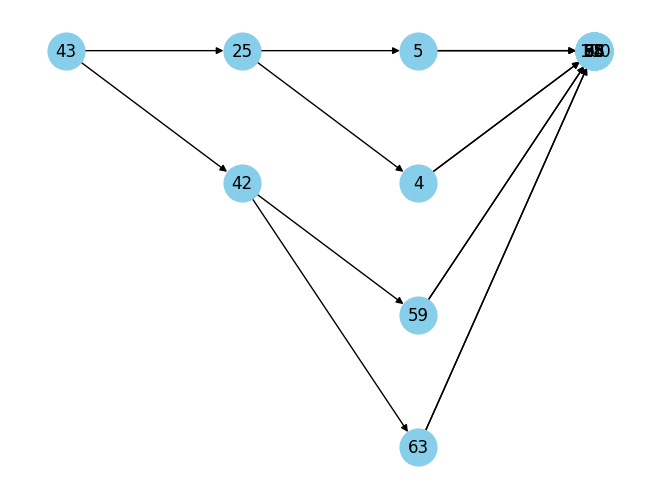

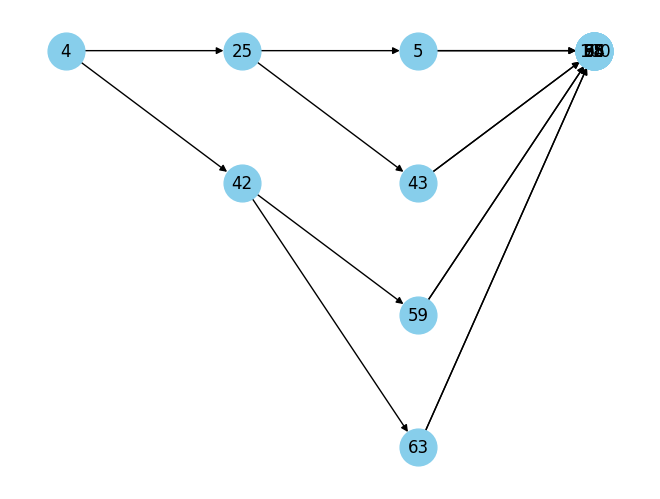

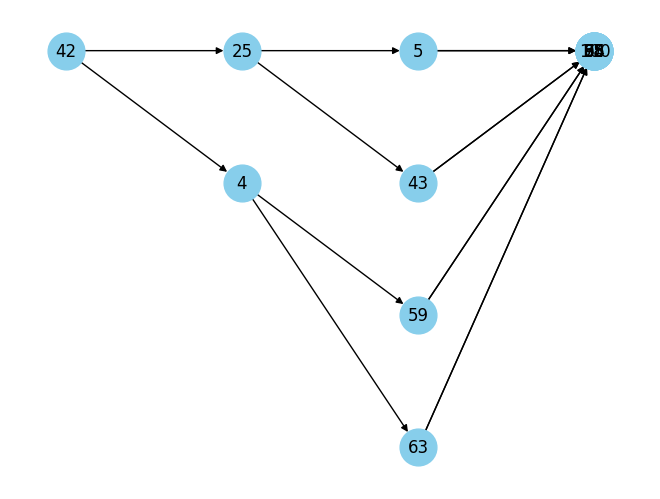

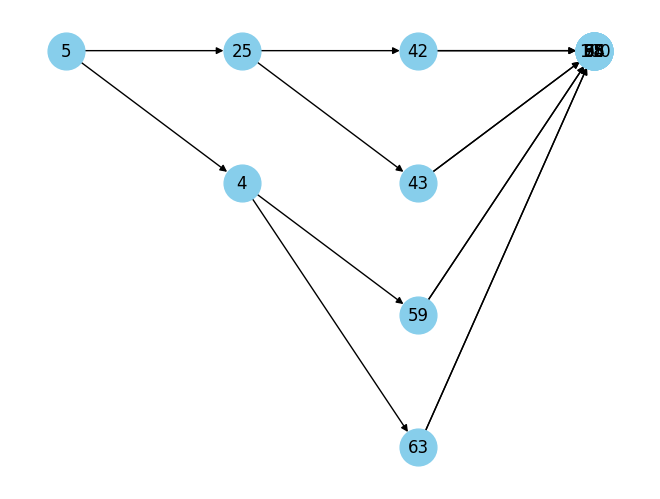

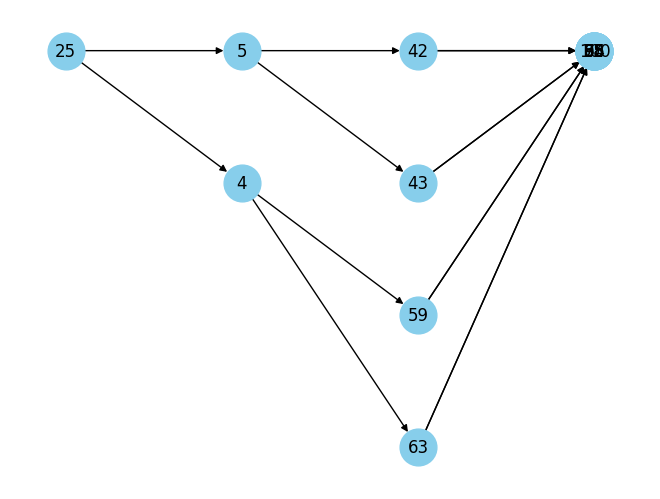

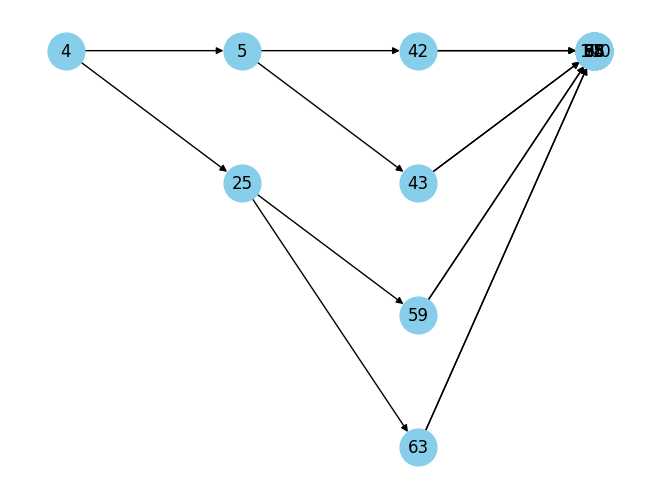

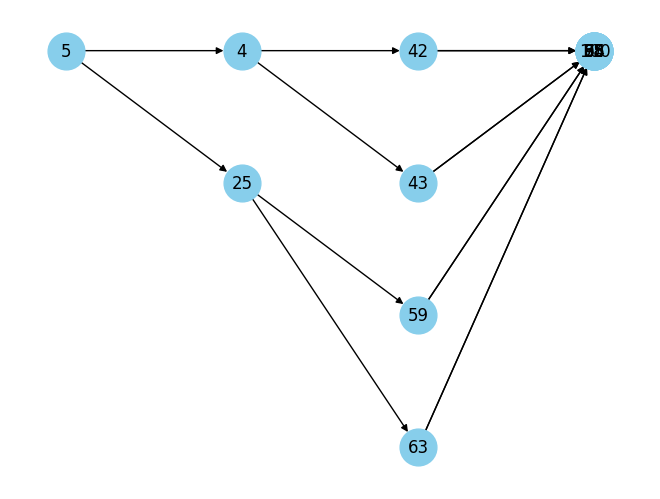

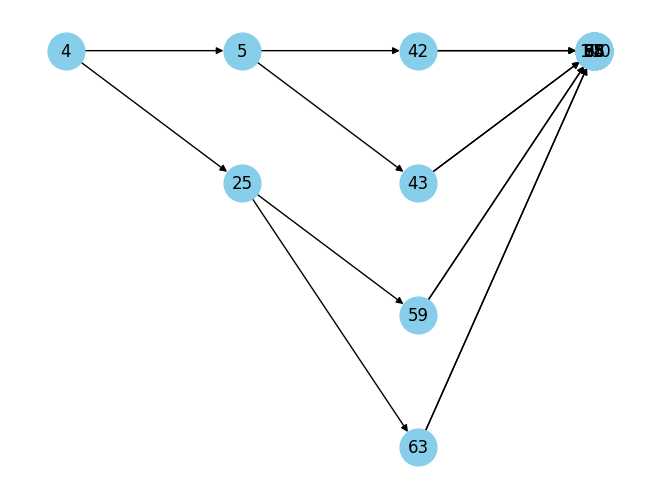

Arreglo ordenado: [4, 5, 25, 42, 43, 59, 63, 68, 75, 85, 88, 88, 94, 95, 100]


In [1]:
# Importamos las bibliotecas necesarias
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
from matplotlib.animation import FuncAnimation

def heapify(arr, n, i, graph, pos, heap_type):
    if heap_type == 'max':
        largest = i
        l = 2 * i + 1
        r = 2 * i + 2

        if l < n and arr[l] > arr[largest]:
            largest = l

        if r < n and arr[r] > arr[largest]:
            largest = r

        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            update_graph(graph, arr, pos)
            heapify(arr, n, largest, graph, pos, heap_type)
    elif heap_type == 'min':
        smallest = i
        l = 2 * i + 1
        r = 2 * i + 2

        if l < n and arr[l] < arr[smallest]:
            smallest = l

        if r < n and arr[r] < arr[smallest]:
            smallest = r

        if smallest != i:
            arr[i], arr[smallest] = arr[smallest], arr[i]
            update_graph(graph, arr, pos)
            heapify(arr, n, smallest, graph, pos, heap_type)

def heap_sort(arr, heap_type='max'):
    n = len(arr)
    graph, pos = create_graph(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i, graph, pos, heap_type)

    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        update_graph(graph, arr, pos)
        heapify(arr, i, 0, graph, pos, heap_type)

def create_graph(arr):
    G = nx.DiGraph()
    for i in range(len(arr)):
        G.add_node(i, value=arr[i])

    for i in range(len(arr)):
        l = 2 * i + 1
        r = 2 * i + 2
        if l < len(arr):
            G.add_edge(i, l)
        if r < len(arr):
            G.add_edge(i, r)

    pos = hierarchical_layout(G)
    return G, pos

def hierarchical_layout(G):
    pos = {}
    level = 0
    next_level = [0]
    while next_level:
        current_level = next_level
        next_level = []
        for node in current_level:
            pos[node] = (level, -len(next_level))
            next_level += list(G.successors(node))
        level += 1
    return pos

def update_graph(G, arr, pos):
    for i in range(len(arr)):
        G.nodes[i]['value'] = arr[i]
    display_graph(G, pos)

def display_graph(G, pos):
    plt.clf()
    labels = nx.get_node_attributes(G, 'value')
    nx.draw(G, pos, with_labels=True, labels=labels, node_color='skyblue', node_size=700, font_size=12)
    plt.pause(0.5)

if __name__ == "__main__":
    arr = [random.randint(1, 100) for _ in range(15)]
    print("Arreglo original:", arr)

    # Elige 'max' para Max Heap y 'min' para Min Heap
    heap_type = 'max'

    plt.ion()
    heap_sort(arr, heap_type)
    plt.ioff()
    print("Arreglo ordenado:", arr)
    plt.show()